In [1]:
# Collect sample data

import requests

url = "https://eodhistoricaldata.com/api/eod/MCD.US?api_token=demo"

data = requests.get(url)

In [2]:
# Save the data in a CSV file

with open("sample_data.csv", "w") as f:
    f.write(data.text)

In [3]:
import pandas as pd

df = pd.read_csv("sample_data.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adjusted_close,Volume
0,1966-07-05,10.9176,11.0872,10.8360,10.9176,0.1334,388800
1,1966-07-06,11.5024,11.5024,10.8360,11.5024,0.1406,692550
2,1966-07-07,11.0872,11.7936,11.0008,11.0872,0.1355,1858950
3,1966-07-08,11.2096,11.2096,10.8360,11.2096,0.1370,1239300
4,1966-07-11,11.1672,11.5024,11.0416,11.1672,0.1365,656100
...,...,...,...,...,...,...,...
14220,2022-12-30,265.2000,265.3800,261.4000,263.5300,263.5300,1720100
14221,2023-01-03,263.5300,264.3500,259.5100,264.3300,264.3300,2743800
14222,2023-01-04,266.2500,266.5500,262.8900,264.3900,264.3900,2584100
14223,2023-01-05,264.7600,264.7600,261.3800,262.1600,262.1600,1945600


In [5]:
df_close = df[["Close"]]
df_close

,Close
0,10.9176
1,11.5024
2,11.0872
3,11.2096
4,11.1672
...,...
14220,263.5300
14221,264.3300
14222,264.3900
14223,262.1600


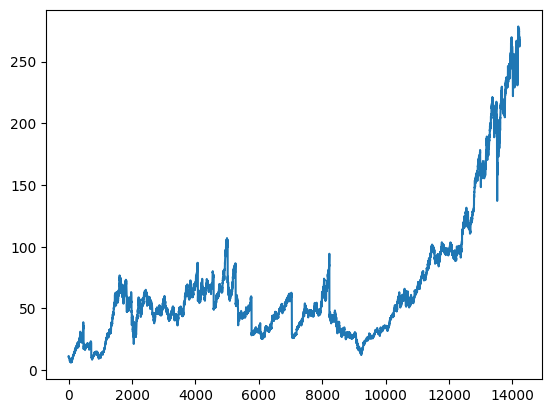

In [6]:
# Plot the data
from matplotlib import pyplot as plt

plt.plot(df_close)
plt.show()

In [7]:
# Split the data into train and test sets
df_train = df_close[:int(0.8*len(df_close))]
df_test = df_close[int(0.8*len(df_close)):]

In [8]:
from sklearn import svm
from sklearn.svm import SVR
svr = SVR(kernel="rbf", C=1, gamma=10)
svr.fit(df_train.index.values.reshape(-1, 1), df_train.values.ravel())

SVR(C=1, gamma=10)

In [9]:
# Save the model using joblib
import joblib

# use level 5 compression
joblib.dump(svr, "sample_model.joblib", compress=5)

['sample_model.joblib']

In [10]:
# load the model
load_model = joblib.load("sample_model.joblib")

In [11]:
predictions = []

In [12]:
import numpy as np
test_data = df_test.values.reshape(-1,1)

46.07713602287185


In [34]:
predicted_closings = []
test_data = df_test.values
range_len = 5

for _ in range(range_len):
    prediction = load_model.predict(test_data.reshape(-1,1))
    predicted_closings.append(prediction[-1])
    test_data = np.append(test_data, prediction[-1])

print(predicted_closings)

[46.07713602287185, 45.30476657258633, 45.844236022306134, 45.46184090224763, 46.073491456815425]


In [39]:
score = 0
thershold = 0.1 # 10% increase per last closing
last = test_data[-1][-1]
for i in predicted_closings:
    # Calculat the percentage increease from last actual closing
    diff = (last - i) / last
    print(diff)
    if diff <= thershold:
        score += 1
    else:
        score -= 1
    last = i
print(score)

0.8290082902628424
0.01676253163612701
-0.011907564932609832
0.008341182081700408
-0.013454152810990883
3
